In [23]:
import yfinance as yf
import pywt
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
seaborn.set_theme()

LLY = yf.download("LLY", period="7y")
NVO = yf.download("VTI", period="7y")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


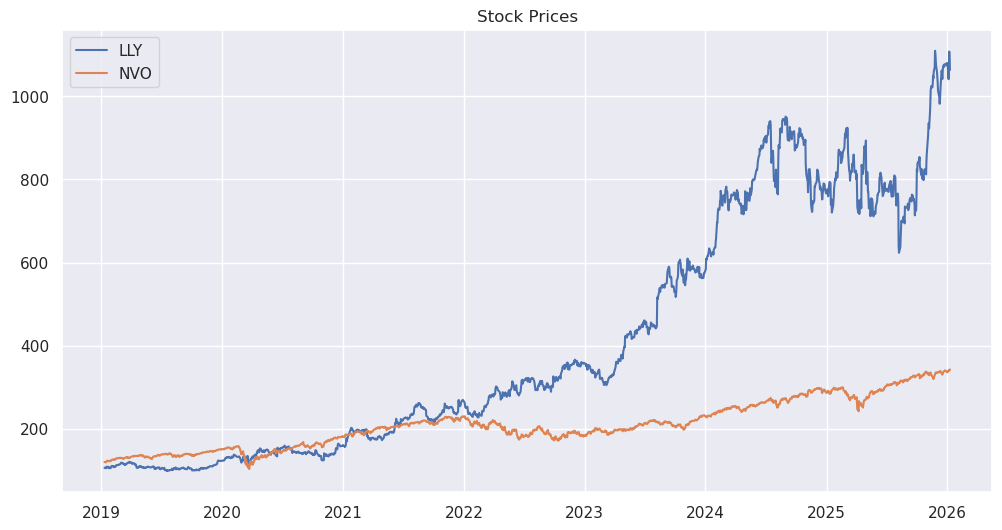

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(LLY.Close, label='LLY')
plt.plot(NVO.Close, label='NVO')
plt.legend()
plt.title('Stock Prices')
plt.show()

In [25]:
LLY.Close.pct_change()

Ticker,LLY
Date,
2019-01-10,NaN
2019-01-11,0.002070
2019-01-14,-0.012911
2019-01-15,0.021015
2019-01-16,-0.002477
...,...
2026-01-05,-0.035960
2026-01-06,0.021632
2026-01-07,0.041399


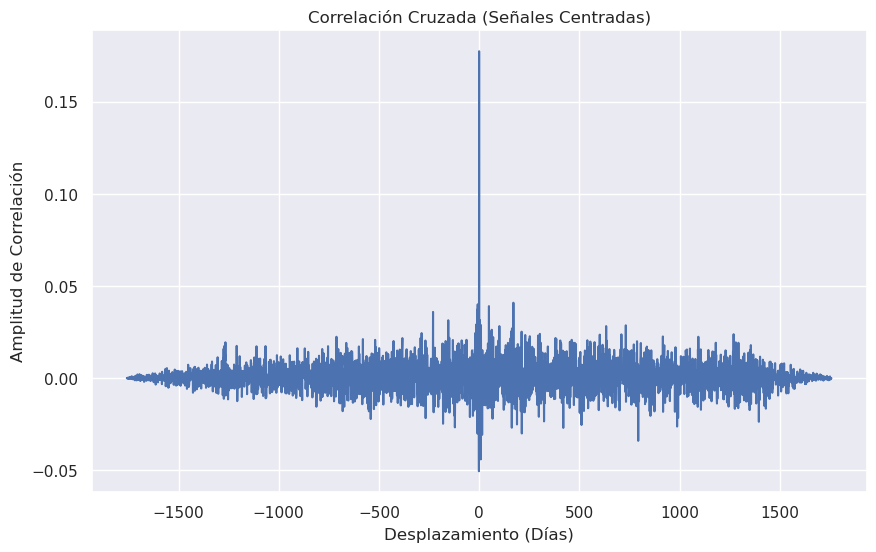

El desfase (lag) de máxima correlación es: 0 días


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

lly_centrada = LLY.Close.squeeze().pct_change().dropna().values
nvo_centrada = NVO.Close.squeeze().pct_change().dropna().values

correlacion = scipy.signal.correlate(lly_centrada, nvo_centrada, mode='full')

lags = scipy.signal.correlation_lags(len(lly_centrada), len(nvo_centrada), mode='full')

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(lags, correlacion)
plt.title('Correlación Cruzada (Señales Centradas)')
plt.xlabel('Desplazamiento (Días)')
plt.ylabel('Amplitud de Correlación')
plt.grid(True)
plt.show()

# Encontrar el lag del máximo
lag_max = lags[np.argmax(correlacion)]
print(f"El desfase (lag) de máxima correlación es: {lag_max} días")

In [21]:
# Pearson Correlation
correlation = LLY.Close.squeeze().pct_change().corr(NVO.Close.squeeze().pct_change())
print(f"Pearson Correlation between LLY and NVO: {correlation:.4f}")

Pearson Correlation between LLY and NVO: 0.4405


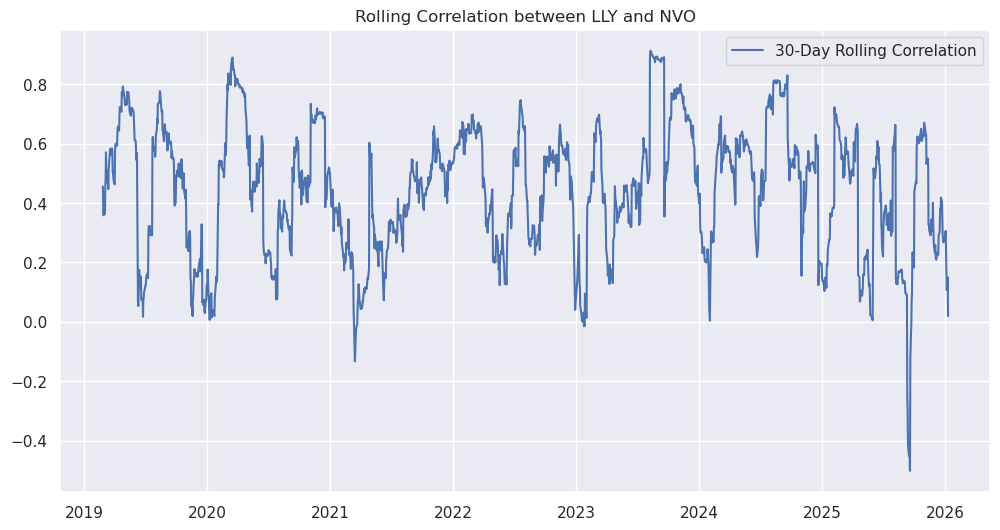

In [22]:
# Rolling Correlation
rolling_corr = LLY.Close.squeeze().pct_change().rolling(window=30).corr(NVO.Close.squeeze().pct_change())

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='30-Day Rolling Correlation')
plt.title('Rolling Correlation between LLY and NVO')
plt.legend()
plt.grid(True)
plt.show()